In [35]:
import cv2 as cv
import glob
import json
from matplotlib import pyplot as plt

In [80]:
def kantu(image_path,ture_boxes_txt_path,detect_boxes_txt_path):
    img = cv.imread(image_path)
    
    f1 = open(ture_boxes_txt_path)             # 返回一个文件对象   
    line = f1.readline()             # 调用文件的 readline()方法   
    while line:   
        #print line, # 在 Python 2中，后面跟 ',' 将忽略换行符   
        a=line.split(" ")
        x1,y1,x2,y2=int(float(a[1])),int(float(a[2])),int(float(a[3])),int(float(a[4][:-2]))
        cv.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (255, 255, 255), thickness=2)
        # 在 Python 3中使用 
        line = f1.readline() 
    f1.close()
    
    f2 = open(detect_boxes_txt_path)             # 返回一个文件对象   
    line = f2.readline()   # 调用文件的 readline()方法   
    while line:   
        a=line.split(" ")
        x1,y1,x2,y2=int(float(a[2])),int(float(a[3])),int(float(a[4])),int(float(a[5][:-2]))
        cv.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 0, 255), thickness=2)
        line = f2.readline() 
    f2.close()
    cv.imwrite("./image/"+"detect_boxes.jpg",img)
    plt.imshow(img)

In [81]:
images_path = sorted(glob.glob('output/metric/fasterRcnn/night_1_to_night/images_optional'+'/*.*'))

In [82]:
print(images_path[:2])

['output/metric/fasterRcnn/night_1_to_night/images_optional/0becd093-65eeaab0.jpg', 'output/metric/fasterRcnn/night_1_to_night/images_optional/0beeb9b1-29cec51b.jpg']


In [111]:
image_path=images_path[100]
name=image_path.split("/")[-1][:-4]
ture_boxes_txt_path='output/metric/fasterRcnn/night_1_to_night/ground_truth/%s.txt'%name
detect_boxes_txt_path='output/metric/fasterRcnn/night_1_to_night/detection_results/%s.txt'%name

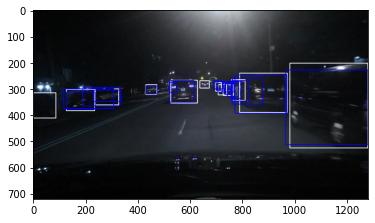

In [112]:
kantu(image_path,ture_boxes_txt_path,detect_boxes_txt_path)

In [7]:
images_path = sorted(glob.glob('output/images/cycleGAN/1_720_1280_1/fake_night'+'/*.*'))
with open("data/labels/train/day.json", 'r') as f:
    lab = json.load(f)

In [8]:
def kk(image_path,boxes):
    img = cv.imread(image_path)
    for box in boxes:
        cv.rectangle(img, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (255, 255, 255), thickness=2)
    plt.imshow(img)

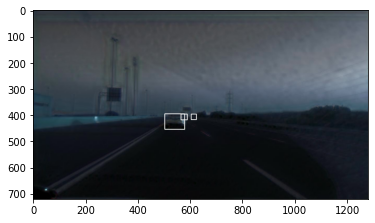

In [9]:
image_path=images_path[50]
name=image_path.split("/")[-1][:-4]
boxes=lab[name]["boxes"]
kk(image_path,boxes)

In [10]:
with open("data/labels/test/day.json", 'r') as f:
    lab = json.load(f)
print(len(lab))

894


In [11]:
with open("data/labels/test/night.json", 'r') as f:
    lab = json.load(f)
print(len(lab))

1010


In [12]:
with open("data/labels/train/day.json", 'r') as f:
    lab = json.load(f)
print(len(lab))

903


In [13]:
with open("data/labels/train/night.json", 'r') as f:
    lab = json.load(f)
print(len(lab))

990


In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from pylab import *

In [32]:
def plotbox(data,title):
#     rcParams['axes.unicode_minus'] = False
    rcParams['font.sans-serif'] = ['Simhei'] 
    df = pd.DataFrame(data)
    df.plot.box()
    plt.xlabel("trainSet",fontsize=16)
    plt.ylabel('mAP(%)',fontsize=16)
    plt.title(title)
    plt.grid(linestyle="--", alpha=0.8)
#     print(df.describe())#显示中位数、上下四分位数、标准偏差等内容
    plt.savefig("./image/"+"_".join(title.split(" "))+".jpg")
    plt.show()

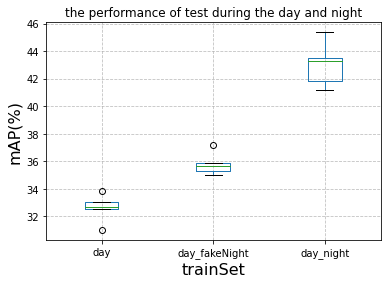

In [33]:
data1={"day":[32.54,32.69,31.01,33.03,33.84],"day_fakeNight":[35.68,35.89,34.98,37.21,35.31],
      "day_night":[43.51,45.37,43.32,41.20,41.82]}
plotbox(data1,"the performance of test during the day and night")

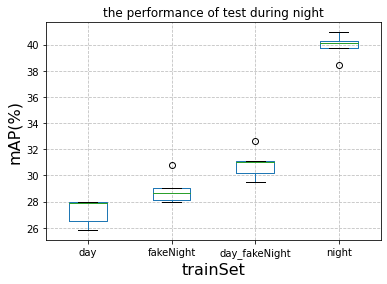

In [34]:
data2={"day":[26.54,27.88,25.83,27.94,27.94],"fakeNight":[30.79,27.94,29.06,28.13,28.67],
       "day_fakeNight":[31.09,31.06,30.20,32.63,29.47],"night":[40.94,40.30,40.13,38.47,39.76]}
plotbox(data2,"the performance of test during night")